In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
measures = pd.read_csv("measures.csv")

In [27]:
len(measures)

8634

In [7]:
measures

,Time_gap_onramp,Distance_gap_upcoming_vehicle,Time_gap_upcoming_vehicle,Is_gap_accepted,Response_time,Participant_no,Dwell_to_mirror
0,4,20,4,1,1195,3,0.826087
1,4,20,4,1,1175,3,0.739130
2,4,20,4,1,1865,3,0.621622
3,4,20,4,1,923,3,1.000000
4,4,20,4,1,1335,3,0.846154
...,...,...,...,...,...,...,...
8629,6,40,6,0,2433,24,0.541667
8630,6,40,6,0,2185,24,0.813953
8631,6,40,6,0,1199,24,0.869565
8632,6,40,6,0,1571,24,0.677419


<AxesSubplot:>

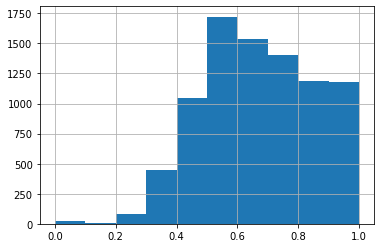

In [6]:
measures.Dwell_to_mirror.hist()

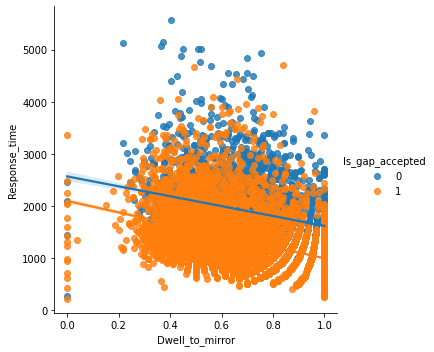

In [11]:
sns.lmplot(data=measures, x="Dwell_to_mirror", y="Response_time", hue="Is_gap_accepted")

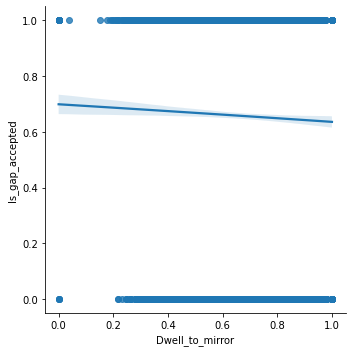

In [39]:
sns.lmplot(data=measures, x="Dwell_to_mirror", y="Is_gap_accepted", logistic=True)

In [36]:
measures["dwell_q"] = pd.qcut(measures.Dwell_to_mirror, 10, labels=False)

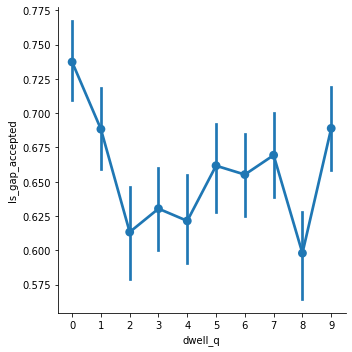

In [37]:
sns.catplot(data=measures, x="dwell_q", y="Is_gap_accepted", kind="point")